## Visualization
Rosenbaum's test has a known, exact null distribution, which is exactly distribution free, meaning that the test works for any underlying distributions F and G which are tested on being equal. 
It constructs an optimal bi-partite matching of all observations, meaning that it pairs each data point to exactly one other, minimizing the within-pair distances.
If F and G are similar or equal, the matching will result in a high number of cross-matches (pairs with one observation from each of the groups). If they are different, the minimal distance pairs will mostly be from the same groups.    
This notebooks visualizes the Rosenbaum test with two distributions. 

#### Experiment with the distributions to see the effects on the matching!

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
from graph_tool.all import Graph, graph_draw
import pandas as pd
import anndata as ad
import sys
sys.path.append("..")
from src import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import itertools
np.random.seed(42)

will use the CPU to calculate the distance matrix.
will use the CPU to calculate the distance matrix.


In [3]:
metric = "sqeuclidean"

In [4]:
np.random.seed(42)

n_samples = 75
means = [(0,0), (0,0), (0.5,0), (1,0), (0,0), (0,0), (1,1)]
covs = [(1,1), (1,1), (1,1), (1,1), (1.5,1), (2,1), (2,1)]
group_labels = ["A", "B", "C", "D", "E", "F", "G"]

samples = [np.random.normal(mean, cov, [n_samples, 2]) for mean, cov in zip(means, covs)]
groups = sum([[label] * n_samples for label in group_labels], [])
data = np.vstack(samples)
adata = ad.AnnData(data)
adata.obs["Group"] = groups

group_colors = {"A": "purple", "B": "orange", "C": "green", "D": "pink", "E": "blue", "F": "lightgreen", "G": "lightblue"}
group_means = dict(zip(group_labels, means))
group_covs = dict(zip(group_labels, covs))
references = ["B", "C", "D", "E", "F", "G"]


using CPU to calculate distance matrix.
creating distance graph.
150
XMatch_group
test         75
reference    75
Name: count, dtype: int64
using CPU to calculate distance matrix.
creating distance graph.


/data/bionets/je30bery/rosenbaum_test/notebooks/../src/rosenbaum.py:151: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


counting cross matches.
using CPU to calculate distance matrix.
creating distance graph.
150
XMatch_group
test         75
reference    75
Name: count, dtype: int64
using CPU to calculate distance matrix.
creating distance graph.


/data/bionets/je30bery/rosenbaum_test/notebooks/../src/rosenbaum.py:151: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


counting cross matches.
using CPU to calculate distance matrix.
creating distance graph.
150
XMatch_group
test         75
reference    75
Name: count, dtype: int64
using CPU to calculate distance matrix.
creating distance graph.


/data/bionets/je30bery/rosenbaum_test/notebooks/../src/rosenbaum.py:151: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


counting cross matches.
using CPU to calculate distance matrix.
creating distance graph.
150
XMatch_group
test         75
reference    75
Name: count, dtype: int64
using CPU to calculate distance matrix.
creating distance graph.


/data/bionets/je30bery/rosenbaum_test/notebooks/../src/rosenbaum.py:151: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


counting cross matches.
using CPU to calculate distance matrix.
creating distance graph.
150
XMatch_group
test         75
reference    75
Name: count, dtype: int64
using CPU to calculate distance matrix.
creating distance graph.


/data/bionets/je30bery/rosenbaum_test/notebooks/../src/rosenbaum.py:151: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


counting cross matches.
using CPU to calculate distance matrix.
creating distance graph.
150
XMatch_group
test         75
reference    75
Name: count, dtype: int64
using CPU to calculate distance matrix.
creating distance graph.


/data/bionets/je30bery/rosenbaum_test/notebooks/../src/rosenbaum.py:151: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


counting cross matches.


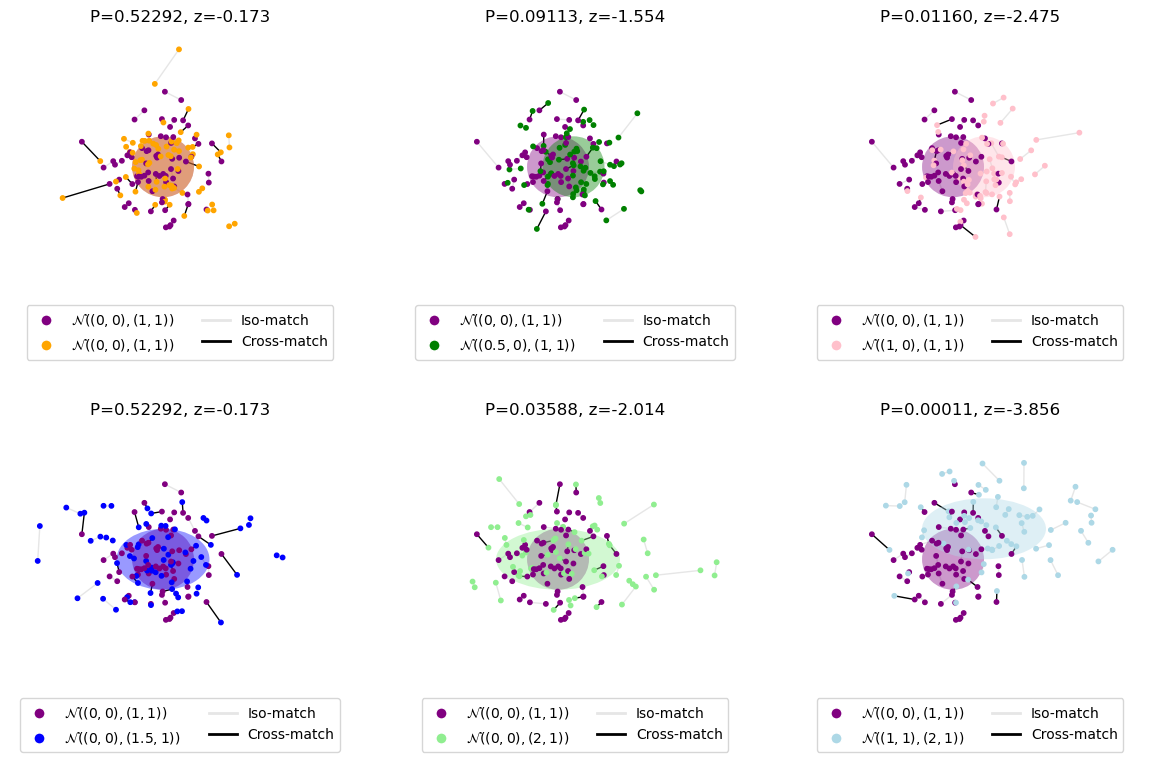

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)
for i, reference in enumerate(references):
    adata_subset, matching, p_val, z, support = get_matching(
        adata[adata.obs["Group"].isin(["A", reference])], test="A", reference=reference)
    
    ax = axs[i // 3, i % 3]
    draw_matching(adata_subset, matching, p_val, z, support, ax, group_colors)

    for group, color in group_colors.items():
        if group == "A" or group == reference:
            draw_ellipse(ax, group_means[group], group_covs[group], color)
    
    ax.legend(handles=legend_elements(groups=["A", reference], group_colors=group_colors, group_means=group_means, group_covs=group_covs), loc='lower center', bbox_to_anchor=(0.5,-0.5), ncol=2)

plt.tight_layout()
plt.savefig("../plots/example_gaussians.pdf")